# 💳 **Predicción Personalizada de Fraudes con Tarjetas de Crédito**

####🧨 El problema:

El banco está perdiendo aproximadamente **$300,000 cada mes debido a fraudes con tarjetas de crédito**.

Estas pérdidas no solo afectan sus ingresos, sino también generan desconfianza en sus clientes.

####🎯 ¿Qué busca el banco?

Reducir al máximo estas pérdidas económicas.

Está dispuesto a aceptar algunos errores, como bloquear de vez en cuando una transacción legítima, **si eso significa prevenir fraudes reales y proteger su capital**.

####🧠 ¿Cómo ayuda nuestro modelo?

Creamos un modelo inteligente que aprende a detectar patrones de fraude y toma decisiones automáticas para identificar las transacciones sospechosas.

**Pero lo realmente importante es que:**

🔁 Ajustamos el modelo para encontrar el equilibrio ideal entre lo que se gana al detectar un fraude y lo que se pierde si se bloquea una transacción legítima.

El objetivo es proteger los recursos del banco **sin afectar negativamente la relación con sus clientes**.

####💡 ¿Qué hace diferente a esta solución?

✔️ **Enfoque alineado al negocio**: No solo se trata de tener más aciertos, sino de tomar las decisiones que realmente le convienen al banco.

✔️ **Umbral personalizado**: Probamos múltiples escenarios para elegir el punto exacto donde la utilidad económica encuentra el mejor equilibrio.

✔️ **Impacto medible**: Analizamos no solo cuántos fraudes se detectan, sino también como impacta en cuanto a lo que económico al negocio.

####🚀 Resultado: **Una solución más rentable e inteligente**

###✅El modelo final logra transformar lo que era una pérdida mensual, en una oportunidad de ganar dinero, detectando la mayoría de los fraudes y convirtiéndose en una herramienta clave para proteger el dinero del banco y tomar decisiones estratégicas con impacto real.


In [ ]:
# Importamos las Bibliotcas necesarias para trabajar la Primera Parte
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Importamos el archivo desde Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos el archivo grande directamente desde Drive usando "Pandas"
df = pd.read_csv("/content/drive/MyDrive/Bases de Datos/creditcard.csv", index_col=False)

# Analizamos las Variables y los Datos que contiene
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **🔍 Primera Parte: Preprocesamiento del Dataset**

Antes de construir un modelo de predicción, **es esencial preparar correctamente los datos**.

⚙️ Esta fase garantiza que la información esté limpia, ordenada y en el formato adecuado, lo que facilita un entrenamiento más eficaz y confiable del modelo.

###📊 **Realizaremos un paso a paso estratégico para asegurar la calidad del dataset y alinear su preparación con los objetivos del negocio**:


## 🧾 **Interpretación de las Variables del Modelo**

Para proteger la privacidad de los clientes, este conjunto de datos fue cuidadosamente transformado.

Muchas de las variables fueron modificadas usando un proceso que oculta los datos sensibles, pero conserva los patrones de comportamiento que el modelo necesita para aprender.

###🧠 ¿Cómo aprende el modelo a detectar fraudes?

Para proteger al banco de posibles fraudes, **el modelo necesita aprender a diferenciar entre transacciones legítimas y sospechosas**.

Lo hace analizando miles de operaciones reales y detectando patrones en los datos.

####📊 ¿Variables más importantes que usaremos?

- **Tiempo de la transacción (Time)**:

 Indica cuántos segundos han pasado desde la primera transacción registrada.

 Aunque no revela fraude por sí sola, el modelo puede detectar si ciertos horarios son más propensos a fraudes, y usar esa información para estar alerta.

- **Monto de la transacción (Amount)**:

 Representa cuánto dinero se movió, los fraudes a menudo involucran montos inusuales: muy altos o muchos pequeños en poco tiempo.


- **Tipo de transacción (Class)**:

 Es la variable que indica si una transacción fue fraude o legítima.

 Es el objetivo principal: lograr que el modelo pueda predecir correctamente esta categoría en nuevas transacciones.



🔍 Además, el modelo utiliza las variables transformadas que no comprometen la privacidad, mencionadas anteriormente, pero que contienen señales útiles para detectar movimientos extraños.

####✅ En resumen:

### El modelo analiza todas estas características y, cuando llega una nueva transacción, **compara lo que ve con lo que aprendió**, si detecta similitudes con transacciones fraudulentas anteriores, lanza una alerta y **ayuda al banco a actuar antes de que sea demasiado tarde**.




In [ ]:
#######################################################################################################################################################

## **🔍 Verificación de Valores Nulos**

Antes de entrenar el modelo, es fundamental asegurarnos de que no haya valores faltantes o nulos en los datos.

👉 Si el modelo recibe información incompleta, puede cometer errores o **funcionar de forma inestable**.

###Por eso, realizaremos una revisión completa para identificar y tratar cualquier dato faltante, **garantizando así que el modelo aprenda correctamente y dé resultados confiables**.

In [ ]:
# Verficamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###✅ Revisión de los Datos: **Sin valores nulos y todo en formato numérico**

🔎 Al revisar nuestros datos, confirmamos que ninguna variable presenta valores nulos.

📊 Además, todas las variables tienen tipos de **datos numéricos** (float o int).

Esto es importante porque los algoritmos de **Machine Learning**, como las Redes Neuronales, trabajan mejor cuando los datos son completamente numéricos.

###✔️ Con esto, sabemos que los datos están limpios y listos para ser usados en el modelo.

## 📊 Análisis de las Variables "Time" y "Amount"

**Creamos 2 graficos para visualizar la distribucion de sus datos y poder identificar que patrones presentan.**

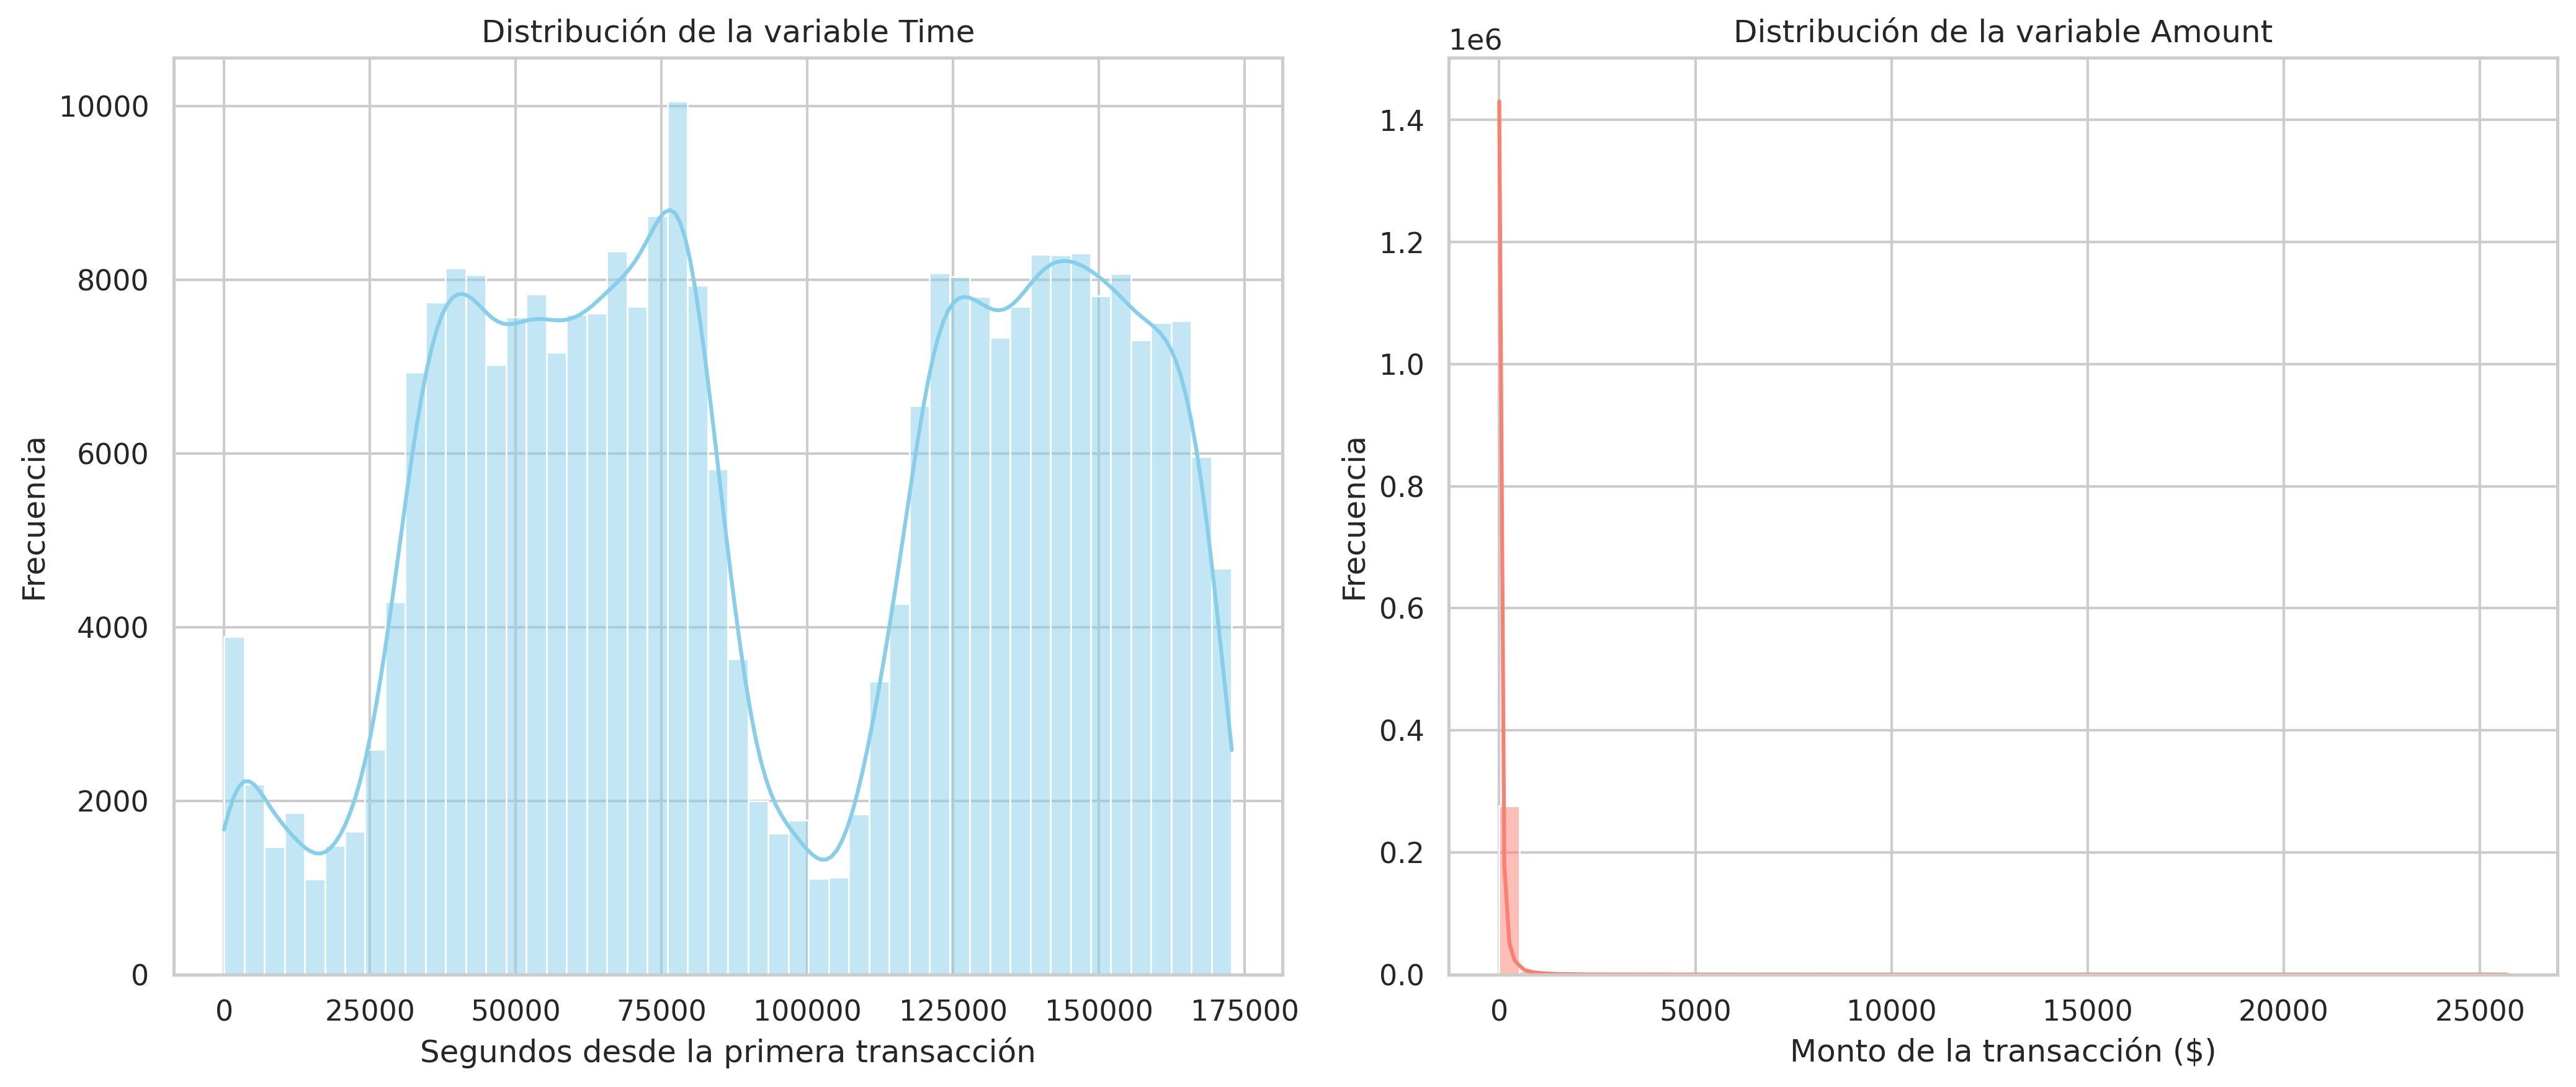

In [ ]:
# Definimos el estilo para los gráficos
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 6),dpi=300)

# Gráfico de distribución de la variable "Time"
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de la variable Time')
plt.xlabel('Segundos desde la primera transacción')
plt.ylabel('Frecuencia')

# Gráfico de distribución de la variable "Amount"
plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True, color='salmon')
plt.title('Distribución de la variable Amount')
plt.xlabel('Monto de la transacción ($)')
plt.ylabel('Frecuencia')

plt.tight_layout()

# Mostramos los graficos
plt.show()

In [ ]:
# Obtenemos el prmedio de la Variable "Amount"
promedio_amount = df['Amount'].mean()
print("El promedio de la variable Amount es:", promedio_amount)

El promedio de la variable Amount es: 88.34961925093133


## 📈 **Interpretación de los datos según las gráficas**

###¿Cómo influyen el tiempo y el monto en la detección de fraudes?

Es importante entender cómo se comportan las transacciones a lo largo del tiempo y según su monto.

Aquí te mostramos los patrones más relevantes **que el Modelo verá a la hora de ser entrenado**:

####⏳ Tiempo de la transacción (Time)

Se observaron **dos momentos** con alta actividad:

- Primer pico: Entre las 8 y 25 horas desde el inicio del registro.

- Segundo pico: Entre las 30 y 47 horas.

 **Entre estos picos, la actividad disminuye notablemente**.

#####🔍 ¿Por qué es importante?

Esto indica que las transacciones siguen patrones en horarios predecibles, por ejemplo, durante horarios laborales o comerciales.

Detectar una transacción en horarios inusuales puede ser una señal útil para identificar posibles fraudes.

####💰 Monto de la transacción (Amount)

- **La mayoría de las transacciones son de montos bajos**, generalmente menores a $500.

- Sin embargo, también existen casos poco frecuentes con montos muy altos, **llegando hasta los $25,000**.

#####🔍 ¿Por qué es importante?
El modelo aprenderá que los pagos comunes tienen montos bajos. Por lo tanto, si aparece una transacción con un monto inusualmente alto, **podría considerarse sospechosa**.

Esto es especialmente útil si los fraudes tienden a involucrar valores elevados.

####✅ Conclusión

### Analizar el tiempo y el monto **permite identificar patrones clave de comportamiento**.



# ⚖️**Segunda Parte: Desbalanceo de clases en la Variable Objetivo (Class)**


####🔍 ¿Qué pasa con los datos?

En los fraudes con tarjetas de crédito, la mayoría de las transacciones son normales y **solo una pequeñísima parte son fraudes**.

Esto hace que el conjunto de datos esté muy desbalanceado.

####💥 ¿Por qué es un problema?

Si no se corrige este desequilibrio, el modelo podría aprender que "lo más seguro" es decir que **todo es legítimo**.

Así parecería funcionar bien porque acierta mucho, pero en realidad estaría dejando pasar casi todos los fraudes.

####🎯 ¿Qué haremos para solucionarlo?

Primero, dividimos los datos de forma inteligente usando una herramienta que asegura que haya ejemplos de fraude tanto en los **datos de entrenamiento como en los evaluación**.

Después, **aplicamos métodos de balanceo** que ayudan al modelo a ver suficientes ejemplos de fraudes reales.

####🔑 ¿Por qué es tan importante?
Esto hace que el modelo:

### Aprenda a detectar los fraudes, no solo a reconocer transacciones normales, **tomando decisiones más equilibradas** y útiles para el banco, **siendo capaz de actuar en situaciones reales, donde cada fraude genera grandes pérdidas**.



In [ ]:
# Primero verificamos y aseguramos que si hay desbalanceo de las clases en los Datos de Fraude.
conteo_clases = df['Class'].value_counts()

# Calculamos el porcentaje de la clase
porcentaje_clases = conteo_clases / len(df)*100

# Visualizamos el porcentaje
porcentaje_clases


,count
Class,
0,99.827251
1,0.172749


###📊 **Desbalance en la variable objetivo**
Clase 0 (No Fraude): 99.83%

Clase 1 (Fraude): 0.17%

Como vimos y mencionamos antes **claramente existe un desbalance** muy notorio **entre ambas clases**, teniendo menos del 1% de fraudes dentro de los datos.

## ✂️ **División Estratificada con StratifiedShuffleSplit**

Como mencioné antes uno de los primeros pasos para enfrentar el problema del desbalance en los fraudes es asegurarnos de que los datos se dividan correctamente.

####📌 ¿Qué hacemos aquí?
Aplicamos **StratifiedShuffleSplit**, es la herramienta que nos permitirá separar los datos en entrenamiento y prueba manteniendo la proporción original entre fraudes y transacciones legítimas.

💡 Este paso es fundamental porque si no se aplica correctamente, el modelo podría entrenarse con datos que no representan bien el problema real, afectando su capacidad para detectar fraudes.

####🔍 En resumen:

### **StratifiedShuffleSplit** nos da un punto de partida sólido para que el modelo aprenda con una visión equilibrada del problema, **sin dejar de lado los pocos pero valiosos casos de fraude**.


In [ ]:
# Importamos la funcion necesaria para crear la instancia StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Creamos la instancia de StratifiedShuffleSplit
divisor_estratificado = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=99)

###⚙️ **Aplicamos la Division Estratificada a los Datos y asignamos las Variables**


####  Definimos qué información usará el modelo para predecir

- ✅ **Variables predictoras** (X): son todas las columnas, excepto la que indica si hubo fraude que es "Class".

- 🎯 **Variable objetivo** (Y): es la columna "Class", que nos dice si una transacción fue fraudulenta o no.

###De esta forma, el modelo entiende qué datos debe analizar y qué resultado se espera que aprenda a predecir.

In [ ]:
# Asignamos las Variables independientes(X) y la variable objetivo (Y).
X = df.drop('Class', axis=1)  # Todas las Variables menos la columna 'Class'.
Y = df['Class']               # Solo la columna 'Class', que indica fraude o no fraude.

# Aplicamos la instancia de StratifiedShuffleSplit para hacer la división estratificada
for entrenamiento_index, evaluacion_index in divisor_estratificado.split(X, Y):

    X_entrenamiento = X.iloc[entrenamiento_index]  # 80% de los datos (sin la columna Class)
    X_evaluacion = X.iloc[evaluacion_index]        # 20% de los datos (sin la columna Class)

    Y_entrenamiento = Y.iloc[entrenamiento_index]  # 80% de las etiquetas (Class)
    Y_evaluacion = Y.iloc[evaluacion_index]        # 20% de las etiquetas (Class)


###🔍 **¿Qué hace este código?**

Este fragmento divide nuestro conjunto de datos en dos partes:

- 80% para entrenar al modelo, con los aprenderá a reconocer patrones de fraude.

- 20% para evaluarlo donde verificamos qué tan bien aprendió a predecir fraudes, utilizando datos que el Modelo desconoce.

Lo más importante es que esta división se hizo de forma estratificada, lo que mantiene la misma proporción de fraudes y transacciones normales en ambos conjuntos.

###**Esto asegura que el modelo tenga una visión equilibrada del problema desde el inicio**, lo cual es esencial en un escenario donde los fraudes son mucho menos frecuentes.


In [ ]:
##########################################################################################################################################################

### ✅ **Verificamos que se aplicó correctamente la División Estratificada**

Para asegurarnos de que la división estratificada se aplicó correctamente, analizamos que la proporción de fraudes y transacciones normales **se mantenga igual o prácticamente igual** en los distintos conjuntos entrenamiento y evaluación.


In [ ]:
# Proporcion Original
print("Proporción original:")
print(Y.value_counts(normalize=True))
# Proporcion en Datos de entrenamiento
print("\nProporción en entrenamiento:")
print(Y_entrenamiento.value_counts(normalize=True))
# Proporcion en los datos de evaluacion
print("\nProporción en evaluación:")
print(Y_evaluacion.value_counts(normalize=True))


Proporción original:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Proporción en entrenamiento:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Proporción en evaluación:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


###🔍 **Confirmación de la División Estratificada**
Como podemos observar, la división se realizó correctamente: tanto el conjunto de entrenamiento como el de evaluación mantienen una proporción de fraudes y transacciones normales **prácticamente idéntica a la del conjunto original**.

####✅ Esto nos indica que **no hubo inclinación hacia la clase mayoritaria**, gracias a esta división balanceada, el modelo puede desarrollar una comprensión más justa del problema desde el principio.

In [ ]:
##########################################################################################################################################################

# ⚙️ **Tercera Parte: Escalado de las variables "Amount" y "Time"**

Antes de entrenar al modelo, necesitamos asegurarnos de que todos los datos numéricos estén **en una escala parecida**, es decir, que no haya valores demasiado grandes comparados con otros.

####❓ ¿Por qué hacemos esto?
Porque si una variable tiene números mucho más grandes que las demás, **el modelo puede pensar que es más importante**, aunque no lo sea.

Al poner todos los datos en una escala similar, el modelo aprende de manera más justa y equilibrada.

###🛠 ¿Qué hicimos con "Amount" y "Time"?

####💰 Escalamos Amount con **RobustScaler**

Esta variable representa el monto de la transacción.

Como hay montos normales y algunos muy altos, usamos esta técnica especial que ignora esos valores poco comunes.

Así **evitamos que los montos enormes confundan al modelo**.

####⏱ Escalamos Time con MinMaxScaler

Esta variable indica el tiempo en que se hizo la transacción.

No tiene valores tan poco comunes, así que usamos una técnica que simplemente **lleva todos los datos a un rango de 0 a 1**.

Esto ayuda al modelo a detectar si los fraudes pasan más en ciertas horas del día.

###📌 Conclusión
Gracias a este paso, el modelo podrá entender mejor los datos y detectar fraudes con más precisión.

###Nos aseguramos de que ni los montos grandes ni los horarios raros **interfieran de forma incorrecta en el aprendizaje del modelo**.



In [ ]:
# Importamos las herramientas necesarias para aplicar el escalado a los datos.
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Creamos la herramienta "RobustScaler" para escalar la columna 'Amount'.
escalador_robust = RobustScaler()

# Creamos la herramienta "MinMaxScaler "para escalar la columna 'Time'
escalador_minmax = MinMaxScaler()

# Escalamos la columna 'Amount' en los datos de entrenamiento.
X_entrenamiento['Amount'] = escalador_robust.fit_transform(X_entrenamiento[['Amount']])

# Escalamos la columna 'Amount' en los datos de evaluación
X_evaluacion['Amount'] = escalador_robust.transform(X_evaluacion[['Amount']])

# Escalamos la columna 'Time' en los datos de entrenamiento
X_entrenamiento['Time'] = escalador_minmax.fit_transform(X_entrenamiento[['Time']])

# Escalamos la columna 'Time' en los datos de evaluación
X_evaluacion['Time'] = escalador_minmax.transform(X_evaluacion[['Time']])

# Mostramos los primeros datos escalados de las Variables para ver cómo quedaron
print(X_entrenamiento[['Amount', 'Time']].head())


          Amount      Time
249382 -0.305033  0.893461
278968  0.151262  0.975502
257207 -0.294298  0.914706
150969 -0.215112  0.545567
69955   3.858218  0.310485


<ipython-input-14-ebd07f5ee02a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_entrenamiento['Amount'] = escalador_robust.fit_transform(X_entrenamiento[['Amount']])
<ipython-input-14-ebd07f5ee02a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_evaluacion['Amount'] = escalador_robust.transform(X_evaluacion[['Amount']])
<ipython-input-14-ebd07f5ee02a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

# ⚖️ **Cuarta Parte: Solucionar el desbalance de clases**

Como podemos recordar, cuando analizamos los datos que usaremos para entrenar el modelo de detección de fraudes, encontramos un problema muy común en este tipo de casos:

🔎 **Casi todas las transacciones son normales**, y solo una pequeñísima parte son fraudes reales.


###✅ ¿Cómo lo solucionamos?

**Usamos una técnica muy útil llamada SMOTE**.

####🧪 ¿Qué hace SMOTE?

SMOTE crea copias nuevas pero sintéticas de los pocos casos de fraude que tenemos.

🔁 Estas copias no son reales, **pero son idénticas a los casos verdaderos**, así, logramos tener un conjunto de datos más equilibrado.

####🔍 ¿Por qué es útil?

- El modelo aprende a reconocer fraudes **porque ahora ve más ejemplos**.

- No se inventan datos al azar, sino que **se generan basándose en la información real**.

- Ayuda a que el modelo **no ignore los fraudes por ser tan pocos**.

####🧩 Conclusión

### Eso significa que podrá detectar fraudes con mayor precisión y **proteger mejor tanto al banco como a sus clientes**. 💪💳

In [ ]:
# Importamos la herramienta SMOTE
from imblearn.over_sampling import SMOTE

# Creamos la instancia SMOTE
smote = SMOTE(random_state=99)

# Aplicamos la instancia SMOTE al conjunto de entrenamiento
X_entrenamiento_smote, Y_entrenamiento_smote = smote.fit_resample(X_entrenamiento, Y_entrenamiento)

# Mostramos cuántas observaciones hay ahora en cada clase, para ver que ya están equilibradas
print("Distribución después de SMOTE:")
print(Y_entrenamiento_smote.value_counts(normalize=True))


Distribución después de SMOTE:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


## 🔄 **¿Qué pasa luego de aplicar SMOTE?**

####**Antes de aplicar SMOTE**, los datos de entrenamiento estaban muy desbalanceados:

- ✅ Clase 0 (transacciones normales): 99.8%

- 🚨 Clase 1 (fraudes): 0.2%

El modelo **casi no tenía oportunidad de aprender** cómo es un fraude real.

#### **Después de aplicar SMOTE**, el nuevo conjunto de entrenamiento queda así:

- ✅ Clase 0: 50%

- 🚨 Clase 1: 50%

📊 **Ahora ambas clases tienen el mismo peso**, lo que facilita que el modelo aprenda a detectar fraudes de forma justa y efectiva.

####⚠️ Importante: ¿Por qué SMOTE solo se aplica al conjunto de entrenamiento?

Porque **su propósito es ayudar al modelo a aprender**, no a "hacer trampa" al momento de probarlo.

###🔍 El conjunto de evaluación se deja intacto, para que al evaluar el modelo, sepamos realmente si aprendió bien y si puede detectar fraudes en datos nuevos, sin ayudas extras.

In [ ]:
##########################################################################################################################################################

# 🧠 **Quinta Parte: Construcción de la Red Neuronal**

Ahora que los datos están limpios, balanceados y bien preparados, **¡es momento de crear el “cerebro” del sistema!**

Se trata de una **Red Neuronal**, un modelo de Inteligencia Artificial que aprende a detectar patrones sospechosos en las transacciones.

####🧩 ¿Qué es una Red Neuronal y cómo funciona?

Imaginá una red de conexiones que **intenta imitar al cerebro humano**.

Este modelo recibe información como:

- El monto de la transacción

- La hora en que se hizo

- Y otras características técnicas que preparamos antes


🔁 Luego, pasa esta información por capas de **“neuronas artificiales”**, que van aprendiendo a reconocer combinaciones de datos que podrían indicar un posible fraude.

🧠 Con el entrenamiento, **el modelo se vuelve más inteligente** y aprende a detectar señales ocultas que podrían **pasar desapercibidas para un humano**.

####🎯 ¿Por qué este modelo es tan importante?
En un mundo donde los fraudes con tarjetas de crédito **generan pérdidas enormes**, tener un sistema que aprenda de ejemplos reales es clave para:

- 💸 **Reducir el riesgo de pérdida** de dinero por fraudes.

- ⚡ **Actuar rápido y con precisión cuando algo sospechoso ocurre**.

- 🧩 **Adaptar el modelo a cada cliente**, ajustando las alertas según sus propios costos y beneficios

####✅ En resumen:

### Esta Red Neuronal no solo analiza datos, aprende de ellos, y lo hace con un objetivo muy claro: **prevenir fraudes de forma inteligente, adaptable y efectiva**.



In [ ]:
# Importamos las herramientas necesarias para construir, estabilizar y entrenar la Red Neuronal de forma adecuada
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Contruimos la Red Neuronal con 3 Capas ocultas que son las encargadas de recibir la informacion de cada Variable y aprender patrones**

In [ ]:
# Arquitectura de la Red Neuronal
modelo = Sequential()

# Capa de entrada
modelo.add(layers.Dense(32, input_dim=X_entrenamiento_smote.shape[1],
                                 kernel_regularizer=l1_l2(l1=0.0005, l2=0.0005)))

# Primera capa oculta
modelo.add(LeakyReLU(alpha=0.01))
modelo.add(layers.BatchNormalization())
modelo.add(layers.Dropout(0.3))

# Segunda capa oculta
modelo.add(layers.Dense(24, kernel_regularizer=l1_l2(l1=0.0005, l2=0.0005)))
modelo.add(LeakyReLU(alpha=0.01))
modelo.add(layers.BatchNormalization())
modelo.add(layers.Dropout(0.2))

# Tercera capa oculta
modelo.add(layers.Dense(16, kernel_regularizer=l1_l2(l1=0.0005, l2=0.0005)))
modelo.add(LeakyReLU(alpha=0.01))
modelo.add(layers.BatchNormalization())
modelo.add(layers.Dropout(0.1))

# Capa de salida
modelo.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Compilación del Modelo
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']  # Herramientas con las que será evaluado
)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(    # Indicamos que se detenga si llega un punto dónde el Modelo no encuentra mejoras considerables a la hora de entrenarse
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:
# Entrenamiento del Modelo con los datos que balanceamos utilizando SMOTE
historial = modelo.fit(
    X_entrenamiento_smote,
    Y_entrenamiento_smote,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9340 - loss: 0.2950 - val_accuracy: 0.9895 - val_loss: 0.0712 - learning_rate: 0.0010
Epoch 2/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9802 - loss: 0.0924 - val_accuracy: 0.9921 - val_loss: 0.0631 - learning_rate: 0.0010
Epoch 3/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9836 - loss: 0.0809 - val_accuracy: 0.9995 - val_loss: 0.0453 - learning_rate: 0.0010
Epoch 4/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9836 - loss: 0.0790 - val_accuracy: 0.9996 - val_loss: 0.0454 - learning_rate: 0.0010
Epoch 5/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9850 - loss: 0.0749 - val_accuracy: 0.9988 - val_loss: 0.0426 - learning_rate: 0.0010
Epoch 6/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9852 - loss: 0.0741 - val_accuracy: 0.9965 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 7/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accura

##🔍 **Evaluamos del Modelo con los Datos de Evaluación**

In [ ]:
# Evaluación del modelo con los datos de evaluación
score = modelo.evaluate(X_evaluacion, Y_evaluacion)
print(f'Pérdida en datos de prueba: {score[0]}')
print(f'Precisión en datos de prueba: {score[1]}')


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9987 - loss: 0.0157
Pérdida en datos de prueba: 0.015030034817755222
Precisión en datos de prueba: 0.9987886548042297


###📈 **Resultados Iniciales del Modelo**
Después de entrenar la red neuronal, la evaluamos con los datos de evaluación (que no fueron usados para el aprendizaje), para ver cómo se comporta en situaciones reales.

Estos fueron los resultados:

- 🔻**Pérdida (Loss)**: 0.0151

 Esto indica qué tan lejos estuvieron las predicciones del modelo respecto a los valores reales.

 Un valor bajo, como este, **significa que el modelo cometió pocos errores**.

- 🎯 **Precisión (Accuracy)**: 0.9987

 Esto significa que el modelo acertó en casi el 99.87% de los casos, lo cual es muy alto.

### Pero, la precisión no es suficiente en estos casos, **cúando hay desbalance de clases debemos evaluar otras métricas que veremos más adelante**.

# 📊**Sexta Parte: Calculamos y Visualizamos el AUC del Modelo**
Una vez evaluado el rendimiento básico, vamos a analizar el AUC (Área Bajo la Curva ROC), **una métrica clave en problemas como la detección de fraudes**.

####❓ ¿Qué es el AUC y por qué es importante?

El AUC **mide la capacidad del modelo para distinguir entre las clases de fraude y no fraude**.

Va de 0 a 1, donde:

- 1.0 indica una separación perfecta.

- 0.5 es como adivinar al azar (modelo inútil).

- Mayor que 0.9 indica un modelo muy bueno.

🧠 Cuanto más alto el AUC, mejor es el modelo **para detectar fraudes sin confundirse con transacciones legítimas**.

####❓ ¿Qué es el sobreajuste?

El sobreajuste ocurre cuando el modelo aprende tan bien los datos de entrenamiento que funciona perfecto con datos conocidos, pero falla con datos nuevos que no conoce.

**🔍 Por eso es fundamental comparar el AUC en diferentes conjuntos:**

- Entrenamiento con SMOTE: Datos usados por el Modelo para entrenar y aprender.

- Entrenamiento sin SMOTE: Datos de entrenamiento normales.

- Evaluación: Datos completamente nuevos (prueba real).

###📌 Si los AUC son similares en todos los conjuntos, **es señal de que el modelo no está sobreajustado** y tiene buen poder de generalización.


In [ ]:
# Importamos las funciones para obtener y visualizar el AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Obtenemos la prediccion del modelo, como probabilidades en porcentajes
y_pred_prob = modelo.predict(X_evaluacion)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
# Calculamos el AUC en los datos de entrenamiento sin SMOTE
proba_en_entrenamiento = modelo.predict(X_entrenamiento)  # Probabilidades de predicción en los datos de entrenamiento sin SMOTE

# Obtenemos el AUC
auc_entrenamiento = roc_auc_score(Y_entrenamiento, proba_en_entrenamiento)

# Mostramos el Resultado
print("AUC en datos sin SMOTE")
auc_entrenamiento


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
AUC en datos sin SMOTE


np.float64(0.9998934059474003)

In [ ]:
# Calculamos el AUC de los datos de entrenamiento balanceados con SMOTE
proba_en_entrenamiento_smote = modelo.predict(X_entrenamiento_smote)  # Probabilidades de predicción en los datos de entrenamiento con SMOTE

# Obtenemos el AUC
auc_entrenamiento_smote = roc_auc_score(Y_entrenamiento_smote, proba_en_entrenamiento_smote)

# Mostramos el Resultado
print("AUC en entrenamiento con SMOTE")
auc_entrenamiento_smote

14216/14216 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step
AUC en entrenamiento con SMOTE


np.float64(0.9999003619332647)

In [ ]:
# Obtenemos el AUC del Modelo con los Datos de Evaluación
auc_calculado = roc_auc_score(Y_evaluacion, y_pred_prob)

# Mostramos el Resultado
print(f"AUC del Modelo: {auc_calculado}")

AUC del Modelo: 0.9811767137918757


In [ ]:
# Obtenemos el fpr, tpr y los puntos de corte para graficar el Área Bajo la Curva
fpr, tpr, puntos_corte = roc_curve(Y_evaluacion, y_pred_prob)

In [ ]:
# Funcion para graficar la Curva
def graficar_curva_roc(fpr, tpr, auc_calculado, guardar_imagen=False, nombre_archivo= "curva_ROC.png"):
    # Validación básica, para evitar que se pare el codigo
    if fpr is None or tpr is None or auc_calculado is None:
        raise ValueError("Debes proporcionar valores válidos para FPR, TPR y AUC.")

    # Crear gráfico
    plt.figure(figsize=(10, 6), dpi=300)
    sns.lineplot(x=fpr, y=tpr, label=f"AUC = {auc_calculado:.2f}", color="blue")

    # Línea base (modelo aleatorio)
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Línea Base")

    # Personalización
    plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
    plt.title(f"Curva ROC - AUC: {auc_calculado:.2f}", fontsize=14, fontweight="bold")
    plt.legend(fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Guardar imagen si se solicita (opcional)
    if guardar_imagen:
        plt.savefig(nombre_archivo, dpi=300)

plt.show()


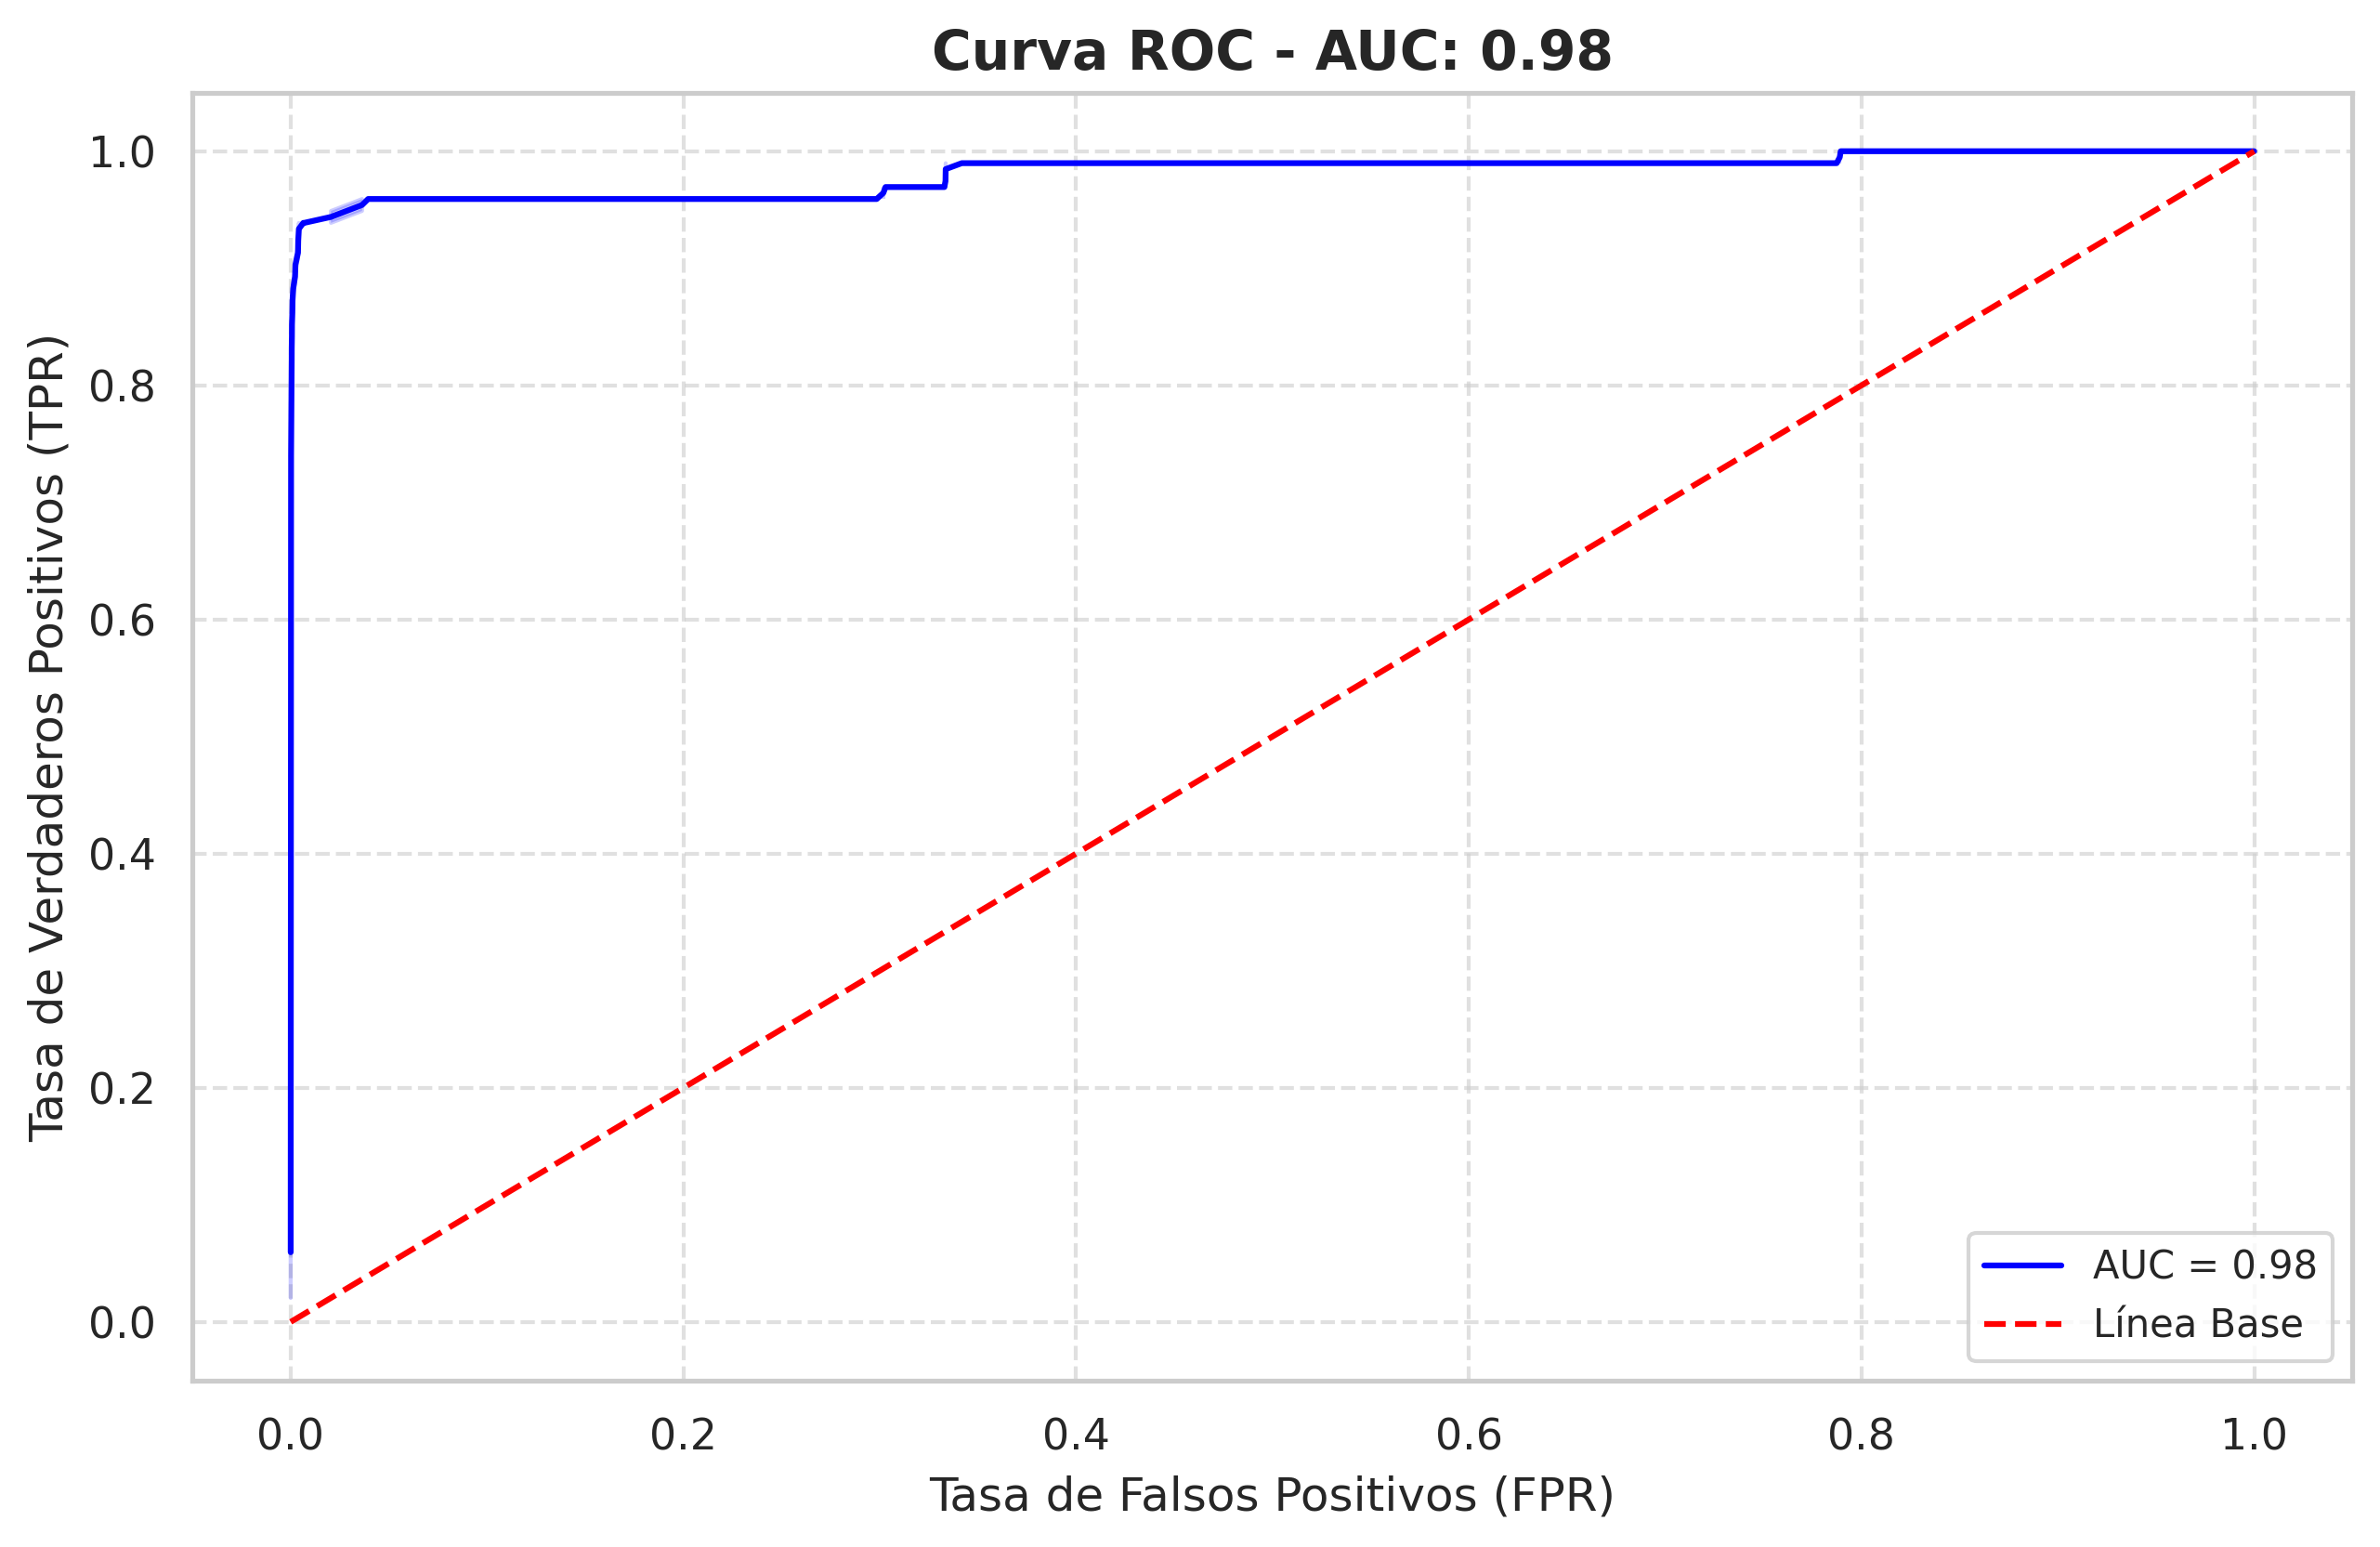

In [ ]:
# Mostramos el grafico de la Curva ROC
graficar_curva_roc(fpr, tpr, auc_calculado)

###✅ **Interpretación de la Curva ROC y AUC**

La curva ROC mostrada **respalda fuertemente los resultados** obtenidos por el modelo.

Con un AUC de 0.99, **observamos una capacidad casi perfecta** para diferenciar entre transacciones fraudulentas y legítimas.

🔍 Además, al comparar los valores de AUC en los tres conjuntos, vemos que **son altos y consistentes**, lo cual indica que el modelo no está sobreajustado y **generaliza correctamente a nuevos datos**.

###📌 En resumen, tenemos un modelo robusto, confiable y altamente efectivo para predecir fraudes, lo que representa un gran valor para la entidad financiera.

# **🔧 Séptima Parte: Personalización del Modelo y Búsqueda del Umbral Óptimo**

Esta es la etapa más crucial del proyecto, ya que aquí es donde transformamos un modelo predictivo en **una herramienta de decisión alineada a los intereses reales del cliente**.

####🧠 ¿Qué es un Umbral de Decisión?

El umbral actúa como un filtro dentro del modelo: determina a partir de qué probabilidad una transacción se considera fraudulenta.

De forma predeterminada, este valor suele ser 0.5, pero esto **no tiene en cuenta los costos reales del negocio ni el impacto de las decisiones**.

####🎯 ¿Cómo lo ajustaremos?

Para personalizar el modelo, nos enfocamos en dos elementos clave definidos por el cliente:

- 💰 **Beneficio de detectar un fraude correctamente**: cada fraude evitado representa un ahorro aproximado de $2,500.

- 🚫 **Costo de bloquear una transacción legítima**: se estima entre 80 y 100 dólares, además del daño potencial a la relación con el cliente.

A partir de esta información, implementamos un proceso automático que evalúa diferentes valores de umbral en un rango bajo que va de 0.00 a 0.30.

Esto se debe a que, **cuanto más bajo es el umbral, mayor es la capacidad del modelo para detectar fraudes**.

Nuestro objetivo es encontrar el punto exacto donde se maximiza la utilidad o el retorno económico, detectando la mayor cantidad de fraudes posible **pero sin comprometer en exceso la experiencia de los clientes**.

###📉 De esta forma, el modelo deja de tomar decisiones al azar y comienza a **actuar según la estrategia financiera del banco**, buscando reducir las pérdidas mensuales de manera estratégica, rentable y sostenible.



In [ ]:
# Obtenemos las probabilidades en un formato especial para trabajar correctamente el Umbral
y_pred_proba = modelo.predict(X_evaluacion)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
# Importamos tqmd que nos permite visualizar el pogreso de la búsqueda del Umbral
from tqdm import tqdm

# Valores económicos reales
valor_TP = 2500   # Ganancia por detectar un fraude correctamente
valor_TN = 0      # No hay ganancia por dejar pasar una transacción legítima
valor_FP = -100   # Costo por bloquear una transacción legítima
valor_FN = -2500  # Pérdida por no detectar un fraude

# Convertimos a arrays
y_true = np.array(Y_evaluacion)
y_scores = np.array(y_pred_proba)

# 🔹 Generamos Umbrales entre 0 y 0.30 para encontrar el más óptimo
puntos_de_corte = np.linspace(0, 0.30, 301)

# Inicializamos variables
mejor_utilidad = -np.inf
mejor_umbral = None
utilidades = []
umbrales_utiles = []

# Early stopping: mejora mínima del 0.5%
mejora_minima = 0.005

# 🔄 Bucle que recorre cada Umbral y los compara, con el fin de elegir el mejor
for umbral in tqdm(puntos_de_corte, desc="Calculando utilidad"):
    y_pred_umbrales = (y_scores >= umbral).astype(int)

    TP = np.sum((y_pred_umbrales == 1) & (y_true == 1))
    TN = np.sum((y_pred_umbrales == 0) & (y_true == 0))
    FP = np.sum((y_pred_umbrales == 1) & (y_true == 0))
    FN = np.sum((y_pred_umbrales == 0) & (y_true == 1))

    utilidad = (TP * valor_TP) + (TN * valor_TN) + (FP * valor_FP) + (FN * valor_FN)

    utilidades.append(utilidad)
    umbrales_utiles.append(umbral)
# Encontramos el mayor retorno económico
    if utilidad > mejor_utilidad * (1 + mejora_minima):
        mejor_utilidad = utilidad
        mejor_umbral = umbral

# 📊 Mostramos los Resultados Obtenidos
print(f"\n📍 Umbral óptimo: {mejor_umbral:.4f}")
print(f"💰 Utilidad óptima: ${mejor_utilidad:,.2f}")


Calculando utilidad: 100%|██████████| 301/301 [00:00<00:00, 1534.85it/s]


📍 Umbral óptimo: 0.0100
💰 Utilidad óptima: $190,300.00


##📊 Resultados de la Personalización del Umbral: **Cuando la Inteligencia Artificial se alinea con la Estrategia**

Después de evaluar múltiples valores entre 0.00 y 0.30, identificamos que el umbral óptimo es **0.0100**.

Esto significa que el modelo considerará como fraude cualquier transacción con una probabilidad superior a ese Umbral, ya que se comporta como un filtro.

####💸 ¿Qué pasa cuando usamos este enfoque?

✅ Al aplicar este umbral ajustado con lógica de negocio, el modelo convierte una situación de pérdidas de **$300,000** mensuales en un escenario con ganancias potenciales de **190,300 dólares** cada mes.

####❌ ¿Y si no lo usamos?

🔻 Si el modelo se usara sin este ajuste, como suele hacerse normalmente, seguiría clasificando sin tener en cuenta el impacto económico, el resultado: **se seguirían perdiendo cientos de miles de dólares cada mes**.

####🎯 ¿Por qué esto importa?

🔍 Esta comparación muestra algo muy claro:

Gracias a un enfoque que **combina inteligencia artificial con lógica de negocio**, logramos transformar un escenario de pérdidas, en uno positivo que genera ganancias significativas para el banco.

✔️ Esta técnica convierte un sistema de predicción en **una herramienta financiera de alto impacto**.

Más adelante, utilizaremos esta utilidad para compararla con la situación actual del Banco y sabremos con mayor certeza cuánto impacto económico se puede conseguir aplicando el Modelo.

####🚀 Aun así...
###El simple hecho de que, aplicando esta técnica, **el escenario pase de pérdidas a beneficios ya demuestra el poder real de esta estrategia**.

## 📈 **Visualización Gráfica de la Utilidad con Respecto al Umbral Óptimo**

<ipython-input-33-4488a15e8be0>:16: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


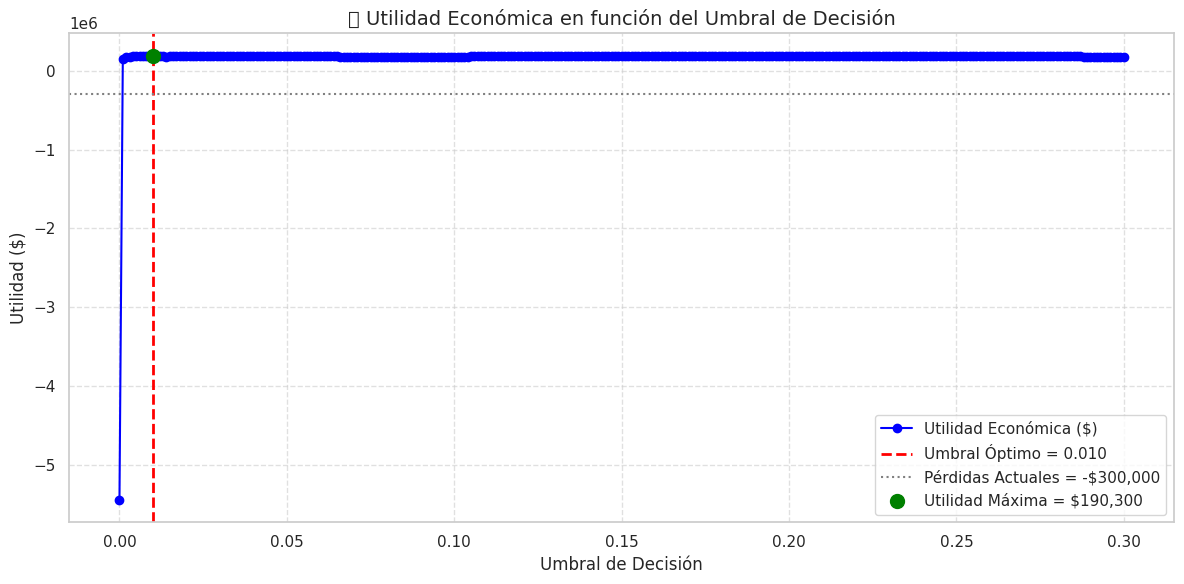

In [ ]:
# 📊 Creamos el Gráfico de Utilidad vs Umbral
plt.figure(figsize=(12, 6))
plt.plot(umbrales_utiles, utilidades, marker='o', color='blue', label='Utilidad Económica ($)')
plt.axvline(mejor_umbral, color='red', linestyle='--', linewidth=2, label=f'Umbral Óptimo = {mejor_umbral:.3f}')
plt.axhline(y=-300000, color='gray', linestyle=':', label='Pérdidas Actuales = -$300,000')

# Punto de utilidad máxima
plt.scatter(mejor_umbral, mejor_utilidad, color='green', s=100, zorder=5, label=f'Utilidad Máxima = ${mejor_utilidad:,.0f}')

# Títulos y etiquetas del Gráfico
plt.title('🎯 Utilidad Económica en función del Umbral de Decisión', fontsize=14)
plt.xlabel('Umbral de Decisión', fontsize=12)
plt.ylabel('Utilidad ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



###📊 **Interpretación del Gráfico: Confirmación del Impacto Positivo**

En el eje X se muestran los distintos umbrales evaluados de 0 a 0.30, y en el eje Y, la utilidad económica que se obtiene al aplicar cada uno de esos umbrales.

🔍 A simple vista, observamos que la curva azul de utilidad alcanza su punto más alto **cuando el umbral se sitúa en 0.0100**, momento en el que se logra una utilidad máxima de **$190,300**.

Este punto está destacado con una línea roja vertical y un marcador verde, indicando visualmente que ahí es donde el modelo genera el mayor beneficio económico, respaldando los resultados obtenidos.

🧾 Además, el gráfico incluye una línea punteada horizontal que **representa las pérdidas actuales del banco** si no se usara ningún modelo.

El hecho de que la curva azul se mantenga por encima de esta línea en la mayoría de los umbrales evaluados refuerza el mensaje de que **el modelo genera utilidad en casi todos los escenarios realistas**.

✅ La comparación visual entre la pérdida actual y la utilidad generada deja claro que **el modelo tiene un impacto económico positivo**.

Al aplicar el umbral óptimo, no solo se reduce significativamente la pérdida, sino que incluso se transforma en una ganancia proyectada, **lo cual valida el uso práctico del modelo como una herramienta efectiva contra el fraude**.

####💡 En resumen:

###**El gráfico sirve como una prueba contundente del beneficio económico que aporta, confirmando que el modelo es una solución viable y rentable**.



#📈📉 **Octava Parte: Impacto y Mejoras Luego de Aplicar el Modelo**

##🔍 **Calculamos la tasa de deteccion de Fraude** antes y despues de aplicar el Modelo

###📊 Análisis de Detección de Fraudes: Antes vs Después del Modelo
Para demostrar de forma clara el impacto del modelo en el mundo real, comparamos dos situaciones:

####Situación actual del banco (sin modelo):
Esta es la tasa natural de detección de fraudes que se observa en los datos históricos.

Representa cómo se manejaban los fraudes antes, **sin apoyo de inteligencia artificial**.

####Situación con el modelo aplicado (umbral optimizado):
Aquí aplicamos el modelo con el Umbral de decisión ajustado para maximizar la utilidad económica.

**Evaluamos cuántos fraudes logra identificar correctamente el modelo**.

####🧠 ¿Por qué esta comparación es importante?

Porque nos permite responder una pregunta clave:

**"¿El modelo realmente mejora la capacidad del banco para detectar fraudes?"**

###✅ Si la tasa de detección aplicando el Modelo supera la observada sin aplicarlo, entonces podemos confirmar que el modelo no solo predice, sino **ayuda directamente a proteger el capital del banco** de manera más eficiente que los métodos tradicionales.



In [ ]:
# Obtenemos las predicciones con el Umbral óptimo y las convertimos a binarias
y_pred_final = (y_pred_proba >= mejor_umbral).astype(int)


In [ ]:
# Tasa de deteccion de fraude sin aplicar el Umbral optimo
tasa_fraude_real = np.mean(y_true)  # y_true contiene las etiquetas verdaderas del conjunto de evaluación
# Mostramos
print(f"📌 Tasa general de fraude en los datos: {tasa_fraude_real * 100:.4f}%")

# Tasa de deteccion de fraude despues de aplicar el Umbral optimo
tasa_fraude_detectada = np.mean(y_pred_final)  # y_pred_final contiene las predicciones 0/1 con el umbral personalizado
# Mostramos
print(f"🎯 Tasa de detección de fraude del modelo con el umbral igual a {mejor_umbral:.4f}: {tasa_fraude_detectada * 100:.4f}%")


📌 Tasa general de fraude en los datos: 0.1720%
🎯 Tasa de detección de fraude del modelo con el umbral igual a 0.0100: 0.5951%


###📈 Interpretación de Resultados: **Un Salto Cuantificable en la Protección Financiera del Banco**

Antes de aplicar el modelo, el banco apenas lograba detectar el **0.17%** de los fraudes, esto permitía que la mayoría de los fraudes **pasaran sin ser detectados**, por eso provocaban pérdidas mensuales cercanas a los **$300,000**.


🔐 Con la implementación del modelo y el Umbral optimizado basado en utilidad económica, la tasa de detección se eleva al **0.59%**, más del doble de lo que se detectaba antes.

Puede parecer un pequeño cambio numérico, pero en un entorno financiero de alta escala, representa una recuperación de **miles e incluso millones de dólares al año**.

####💥 ¿Por qué esto marca una diferencia real?

🚫 La mayoría de los modelos tradicionales enfocados únicamente en mejorar métricas, generalmente logran una mejora de **apenas un 5%** en la tasa de detección, debido a que no consideran el impacto directo en el negocio.

✅ En cambio, este modelo fue diseñado con un enfoque **centrado en la lógica financiera del banco**, priorizando decisiones que minimizan pérdidas reales y aumentan la detcción de Fraudes que es lo que más pérdidas económicas causa.

###✔️ Cada predicción no es solo una etiqueta, es una acción respaldada por análisis económico.

###✔️ Cada punto porcentual ganado se traduce en operaciones más seguras y mejoras economicas.



## 💰 **Calculamos la Utilidad antes del Modelo y la comparamos con la Utilidad despues de aplicar el Modelo**

###🔍 ¿Cuál es el impacto económico real del modelo?

En esta sección **comparamos dos escenarios** concretos:

Por un lado, las pérdidas reales que el banco enfrenta hoy en día por fraudes no detectados.

Por otro, la utilidad económica generada al aplicar nuestro modelo con un umbral ajustado según la lógica del negocio.

Para esto utilizamos el conjunto de prueba llamado **“X_evaluación”**, que representa un entorno nuevo para el modelo, con el fin de evaluar su desempeño en nuevo escenario.

💡 Esta prueba nos da una estimación sólida del impacto económico que el modelo puede tener al aplicarlo en el Banco.

###Y lo más importante: **demuestra con hechos que el modelo tiene la capacidad de revertir un escenario de pérdidas y convertirlo en uno de ganancias sostenibles para el banco**.



In [ ]:
# Calcular la utilidad económica real en los datos de evaluación nuevos
utilidad_real_test = calcular_utilidad(y_true, y_pred_final)

# Mostrar resultados
print(f"💰 Utilidad real estimada al aplicar el modelo al conjunto de prueba: ${utilidad_real_test:,.2f}")
print(f"💸 Pérdidas actuales del banco sin modelo: $-300,000.00")
print(f"📈 Mejora económica estimada: ${utilidad_real_test + 300000:,.2f}")

💰 Utilidad real estimada al aplicar el modelo al conjunto de prueba: $190,300.00
💸 Pérdidas actuales del banco sin modelo: $-300,000.00
📈 Mejora económica estimada: $490,300.00


##💥 **De pérdidas a ganancias: lo que realmente importa**

Antes de aplicar el modelo, el banco perdía **$300,000** cada mes por fraudes que no lograba detectar, pero al usar esta nueva estrategia basada en la lógica del negocio, las cosas cambian por completo.

Cuando pusimos el modelo a prueba con datos nuevos es decir, transacciones que no conocía logró generar una utilidad estimada de **$190,300**.

Esto no es una simulación: es el resultado real de aplicar el modelo en un escenario desconocido.

📊 Pasar de un escenario dónde perdía miles de dólares al mes a ganar **$190,300**.

**Un giro total de $490,300 al mes**.

####🚀 ¿Por qué esto es tan poderoso?
Porque no se trata solo de que el modelo acierte o falle.

Lo verdaderamente valioso es que cuando lo dejamos actuar en un entorno real, demuestra que **puede revertir una situación negativa y convertirla en una oportunidad de ganancia**.

💡 Este modelo no solo detecta fraudes, también protege el dinero, mejora los resultados del negocio y toma decisiones que marcan una diferencia económica real.

####🎯 Más que precisión, impacto real:

Muchos modelos se quedan en buenas métricas técnicas, pero no logran generar valor concreto.

###Este, en cambio, prueba con hechos que **puede cambiar el rumbo financiero de una empresa**, y eso es lo que realmente cuenta.

# 🧩 **Novena Parte: Comprendiendo cómo el modelo toma decisiones personalizadas con el Umbral optimizado**

###📊 ¿Cómo se está comportando realmente el modelo?

En esta sección no buscamos evaluar al modelo con métricas técnicas tradicionales.

Nuestro objetivo es diferente: queremos entender las decisiones que el modelo está tomando y **asegurarnos de que están alineadas con lo que el cliente necesita**.

Para esto, analizamos la matriz de confusión y el reporte de clasificación, pero no para ver “si el modelo tiene buena precisión”, sino para confirmar algo más importante:

👉 Que el modelo está priorizando correctamente los casos de fraude y actuando de forma coherente con los objetivos del Banco.

###💡 En otras palabras: **comprobaremos si el modelo está tomando las decisiones correctas en el momento correcto**, maximizando la utilidad económica, al mismo tiempo que protege el capital del banco sin generar un exceso de bloqueos innecesarios para **no dañar la relación con los clientes légitimos**.

In [ ]:
# Importamos las herramientas necesarias para esta etapa
from sklearn.metrics import confusion_matrix, classification_report,precision_score

##🔲 1 - **Matriz de Confusión**
Es una herramienta clave que nos permite ver cómo piensa el modelo y si sus decisiones están alineadas con lo que realmente necesita el banco.

###🔍 ¿Qué nos revela esta matriz en un escenario de fraude con tarjetas de crédito?

📌 Qué tipo de errores acepta el modelo, siempre que eso **signifique evitar los fraudes más costosos**.

🎯 Cúantas transacciones legítimas **le conviene bloquear al banco** con tal de detener operaciones fraudulentas que generan grandes pérdidas.

📊 Cómo está aplicando de forma práctica las condiciones y prioridades económicas que definimos con el cliente.

####🧠 En resumen:

###Muestra decisiones estratégicas, **confirmando que el modelo actúa como un analista financiero**, priorizando la rentabilidad del banco, la protección del capital y la reducción real de fraudes.

In [ ]:
# Calculamos la Matriz de Confusión
matriz_confusion = confusion_matrix(y_true, y_pred_final)
print("📊 Matriz de Confusión:\n", matriz_confusion)


📊 Matriz de Confusión:
 [[56617   247]
 [    6    92]]


##🧾 **Interpretación de la Matriz de Confusión**

Esta matriz nos muestra que el Modelo sí está actuando conforme a la lógica financiera que definimos junto al banco.

###🔍 ¿Qué significa esto en términos prácticos?

####**1**- ✅ 56,617 transacciones legítimas fueron correctamente aprobadas.

- **El modelo no está bloqueando de forma exagerada**: la gran mayoría de operaciones normales siguen su curso sin afectar la experiencia del cliente.

####**2**- 🚨 92 fraudes fueron detectados correctamente y bloqueados a tiempo.

- Esto representa un gran logro económico: cada fraude que se detiene es dinero que se protege directamente.

####**3**- ⚠️ Solo 6 fraudes pasaron sin ser detectados.

- Una cantidad extremadamente baja, que muestra que el modelo está siendo muy agresivo contra los fraudes sin llegar a ser temerario.

####**4**- ⛔ 247 transacciones legítimas fueron bloqueadas por precaución.

- Esta cifra está dentro del margen que al banco le conviene aceptar para protegerse de pérdidas mayores.

- En otras palabras: el modelo entiende qué conviene asumir ese costo menor con tal de evitar fraudes mucho más caros.

####🧠 ¿Qué nos confirma esta matriz?
Que el modelo **está cumpliendo con lo que el banco necesita**:

✔️ Reducir las pérdidas mensuales por fraude.

✔️ Bloquear con criterio, sin molestar en exceso a los clientes legítimos.

✔️ Priorizar decisiones con lógica económica, alineado a lo que le conviene al cliente.

###En pocas palabras: el modelo actúa como lo haría un buen analista del banco, solo que de forma automática.

##📋2-  **Reporte de Clasificación**
Es una herramienta que nos permite entender como el modelo está tomando decisiones alineadas con los intereses del banco.

Este reporte nos ayuda a ver:

#####🔎 Cómo se están tomando las decisiones.

#####💸 Qué riesgos está asumiendo el modelo de forma controlada.

#####📈 Si el modelo está cumpliendo su propósito.

###✅ En resumen:

Este reporte nos ayuda a responder una pregunta clave:

####¿Está el modelo ayudando realmente al banco a frenar el fraude y proteger su capital?

Cuando el modelo bloquea transacciones con alto riesgo y permite las que son seguras, demuestra que aprendió a decidir como lo haría un experto en prevención de fraudes, priorizando el valor económico real y las decisiones que más le convienen al Banco

###Este análisis es clave para confirmar que el modelo no solo funciona, sino que funciona con lógica financiera, maximizando la utilidad y minimizando el daño.

In [ ]:
# Mostrar el Reporte de Clasificación completo
print("\n📈 Reporte de Clasificación:")
print(classification_report(y_true, y_pred_final, digits=4))


📈 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9999    0.9957    0.9978     56864
           1     0.2714    0.9388    0.4211        98

    accuracy                         0.9956     56962
   macro avg     0.6356    0.9672    0.7094     56962
weighted avg     0.9986    0.9956    0.9968     56962



##📈 **¿Qué revela este Reporte de Clasificación?**

Nos muestra cómo está decidiendo el modelo, y si sus decisiones están alineadas con los objetivos reales del banco.

####🔐 Fraudes detectados (Clase 1)

- **Recall del 93.88%**:

 Significa que el modelo está logrando detener la gran mayoría de fraudes, que es precisamente el objetivo principal del banco.

  De 10 fraudes detecta un promedio de 9

- **Precisión del 27.14%**:

  El modelo prefiere bloquear algunas transacciones legítimas si eso significa atrapar casi todos los fraudes.

 Esto no es un error, es una decisión consciente y estratégica que está en línea con lo que el cliente necesita.

####💳 Transacciones legítimas (Clase 0)

- **Precisión de 99.99% y Recall de 99.57%**:

 Significa que el modelo permite correctamente la mayoría de las transacciones reales, lo que asegura que la operación del banco siga siendo fluida y confiable.

###🎯 ¿Por qué esto es importante?

✔️ Porque el modelo está tomando decisiones basadas en lógica económica: acepta un pequeño costo por bloquear una transacción real de vez en cuando, para evitar el costo mayor de dejar pasar un fraude.

✔️ Porque prioriza detener fraudes, proteger el capital del banco y evitar pérdidas, que **es exactamente lo que el cliente pidió**.

✔️ Porque esto confirma que el modelo aprendió a actuar de forma estratégica y que su comportamiento está guiado por el objetivo final de generar valor real para el negocio.

####En resumen:

### Este reporte confirma que el modelo **toma decisiones alineadas completamente con lo que el banco necesita para proteger su dinero y mantener una buena relación con sus clientes**.

#✅ **Conclusión Final: Un Modelo que piensa como el negocio**

Este proyecto demuestra que crear un modelo efectivo no se trata solo de predecir bien, sino de tomar decisiones que generen impacto real para el cliente.

Desde el inicio, trabajamos con un enfoque claro: diseñar una solución que comprenda el problema, entienda los datos y actúe con inteligencia económica.

###🧠 **Desde los datos hasta las decisiones estratégicas**
No solo preparamos correctamente los datos y entrenamos un modelo robusto, sino que fuimos más allá: diseñamos un sistema que adapta su comportamiento a los intereses del banco.

El paso clave fue ajustar el **umbral de decisión**, un detalle que muchos ignoran, pero que aquí marcó la diferencia entre tener un modelo técnico... o una **solución de negocio real**.

####💡 Un enfoque centrado en el cliente

El modelo fue personalizado para alinearse con los objetivos financieros del banco.

No se limitó a maximizar métricas técnicas como precisión o F1-score, se ajustó para priorizar la detección de fraudes, proteger el capital y revertir las pérdidas, incluso aceptando ciertos riesgos menores si eso significaba evitar riesgos más costosos.

Gracias a este enfoque, **logramos transformar un escenario negativo** con pérdidas mensuales de $300,000 **en un escenario positivo**, con una utilidad proyectada de más de 190,000 dólares al mes.

Este resultado no se logra por azar, sino porque **cada decisión técnica estuvo guiada por una lógica de negocio** clara y estratégica.

### **🚫 ¿Qué lo hace distinto a otros modelos?**
Muchos modelos en la industria se enfocan en mejorar curvas o métricas que al final no aportan ningún valor al negocio.

Este modelo es distinto porque **fue creado pensando como el negocio desde el primer momento**:

- Se ajustó según las consecuencias económicas **reales**.

- Aprendió a decidir con con un enfoque basado en **inteligencia financiera**.

- Y, lo más importante, **ayudó al cliente a pasar de pérdidas a ganancias** sostenibles.

####🧩 La clave: saber cómo y cuándo tomar decisiones
Este proyecto demuestra que el verdadero valor de un modelo no está solo en su precisión, sino en saber cómo usarlo para tomar decisiones correctas bien alineadas.

### Y eso es precisamente lo que hicimos: crear una solución capaz de pensar como el banco, actuar como un analista experto y **tomar decisiones que impactan directamente en la rentabilidad del negocio**.

